<a href="https://colab.research.google.com/github/Marjia275/AI_Thesis_Project/blob/main/Demand_Forecasting(done).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Librarires*

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

sns.set_palette("viridis")
plt.style.use('seaborn-v0_8-whitegrid')

Upload dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retail_store_inventory.csv to retail_store_inventory (2).csv


In [ ]:
file_path = "/content/retail_store_inventory.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [ ]:
print("Number of data in the dataset:", df.shape[0])

Number of data in the dataset: 73100


In [ ]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [ ]:
print("\nColumns:", df.columns.tolist())


Columns: ['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing', 'Seasonality']


**Exploratory Data Analysis.**

**Univariate Analysis**
Goal: Understand the distribution and characteristics of individual variables.

*Demand forecast vs all features**

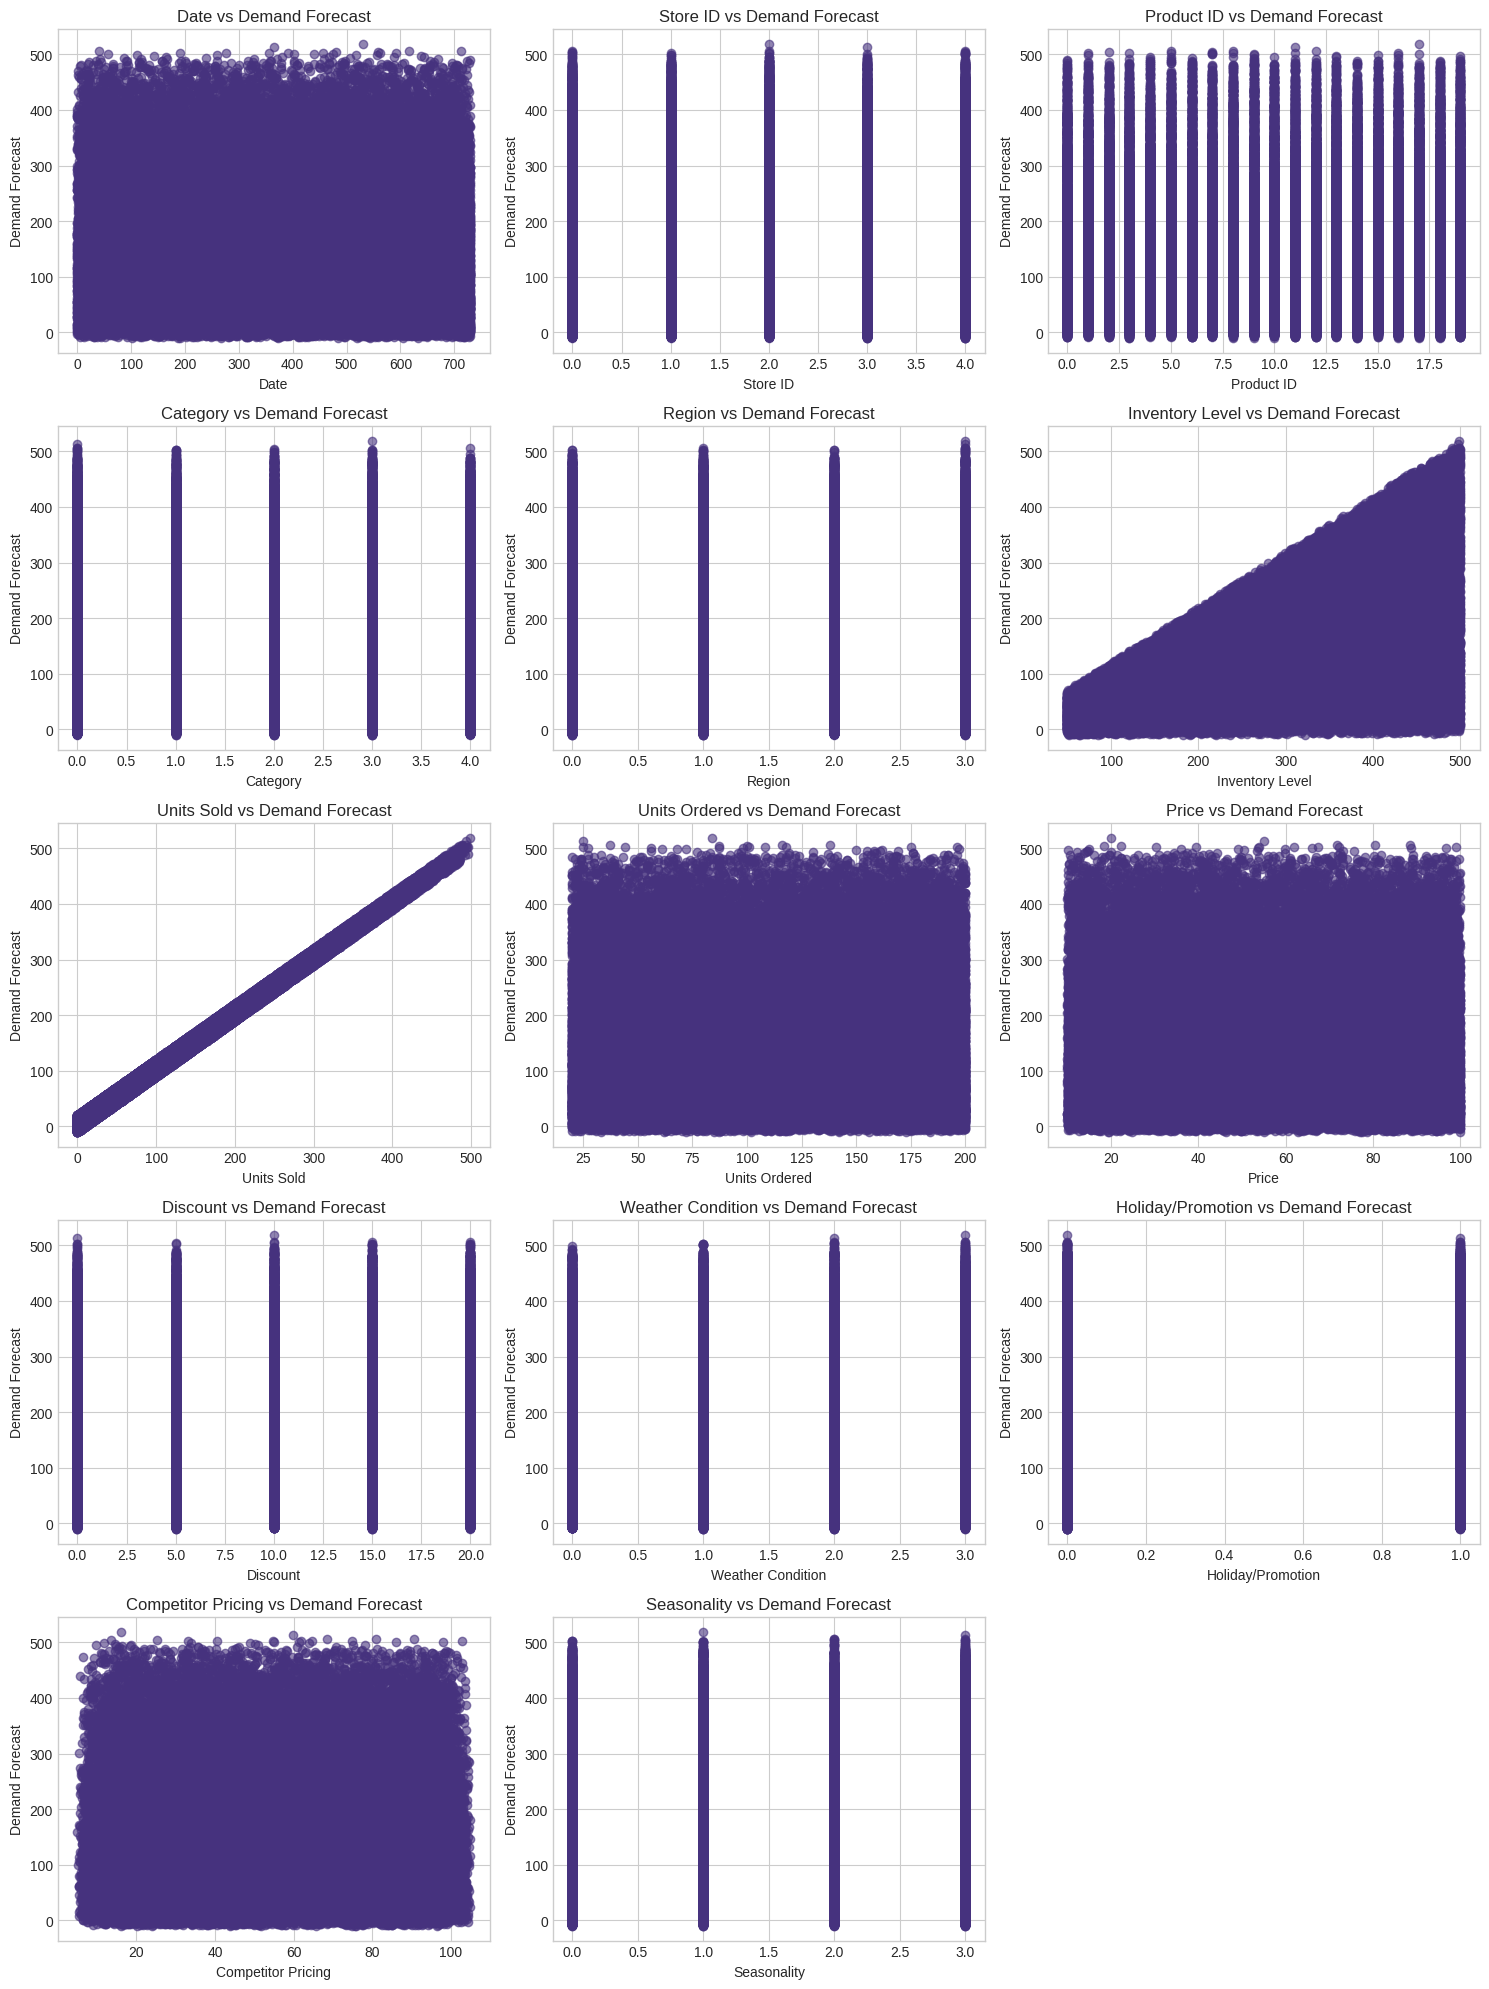

In [ ]:
# Copy dataframe for plotting
df_plot = df.copy()

# Strip extra spaces from column names
df_plot.columns = df_plot.columns.str.strip()

# Explicitly include all columns except target
features = [col for col in df_plot.columns if col != 'Demand Forecast']

# Convert all nonnumeric columns to numeric codes for plotting
for col in features:
    if df_plot[col].dtype == 'object' or df_plot[col].dtype.name == 'category':
        df_plot[col] = pd.factorize(df_plot[col])[0]

# Define subplot grid size
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

# Plot each feature against Demand Forecast
for i, feature in enumerate(features):
    axes[i].scatter(df_plot[feature], df_plot['Demand Forecast'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Demand Forecast')
    axes[i].set_title(f'{feature} vs Demand Forecast')

# Remove any empty subplots (if grid has extra slots)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**2. Demand Forecast vs Forecast Accuracy**
Goal: Assess how the accuracy of demand forecasts relates to the forecasted demand values.

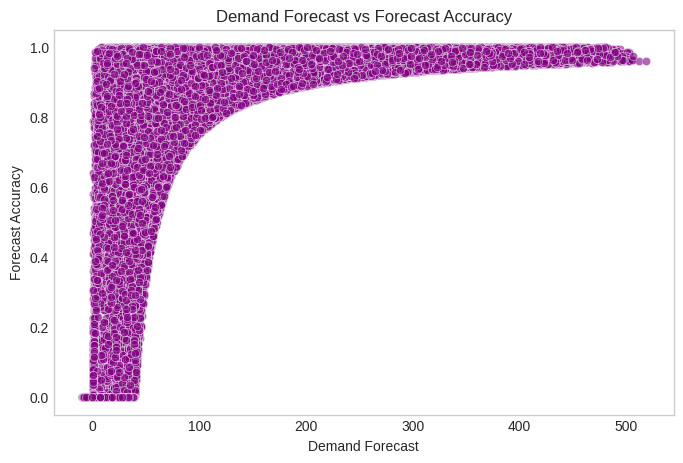

In [ ]:
# Compute forecast accuracy (clip values to [0,1])
df['Forecast_Accuracy'] = 1 - abs(df['Units Sold'] - df['Demand Forecast']) / df['Units Sold']
df['Forecast_Accuracy'] = df['Forecast_Accuracy'].clip(0, 1)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Demand Forecast', y='Forecast_Accuracy', data=df, color='purple', alpha=0.6)
plt.title('Demand Forecast vs Forecast Accuracy')
plt.xlabel('Demand Forecast')
plt.ylabel('Forecast Accuracy')
plt.grid(True, linestyle='', alpha=0.4)
plt.show()

**3. Units Sold – Distribution**
Goal: Examine the distribution and spread of the 'Units Sold' variable.

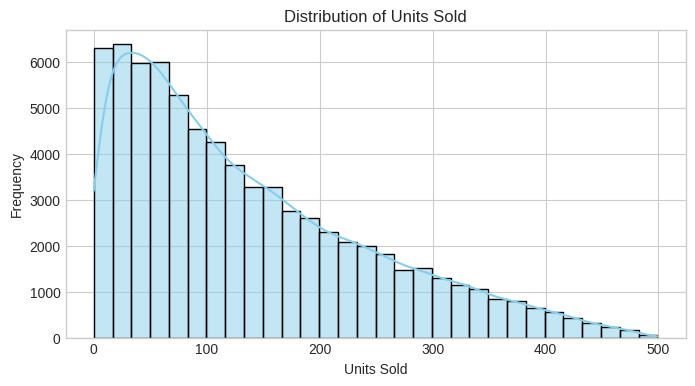

<Figure size 800x400 with 0 Axes>

In [ ]:
if 'Units Sold' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['Units Sold'], bins=30, kde=True, color='skyblue')
    plt.title("Distribution of Units Sold")
    plt.xlabel("Units Sold")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(8,4))


    plt.show()


**4. Demand Forecast – Distribution**
Goal: Examine the distribution of the 'Demand Forecast' variable.

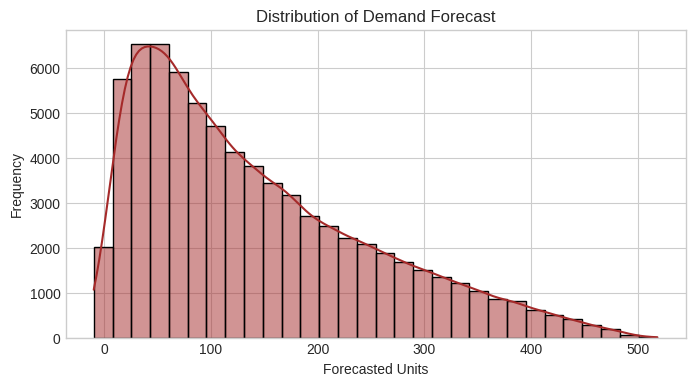

In [ ]:
if 'Demand Forecast' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['Demand Forecast'], bins=30, kde=True, color='brown')
    plt.title("Distribution of Demand Forecast")
    plt.xlabel("Forecasted Units")
    plt.ylabel("Frequency")
    plt.show()


**Bivariate Analysis**
Goal: Explore the relationship between pairs of variables.

**3. Demand Forecast vs. Units Sold**
Goal: Visualize the correlation between the forecasted demand and the actual units sold.

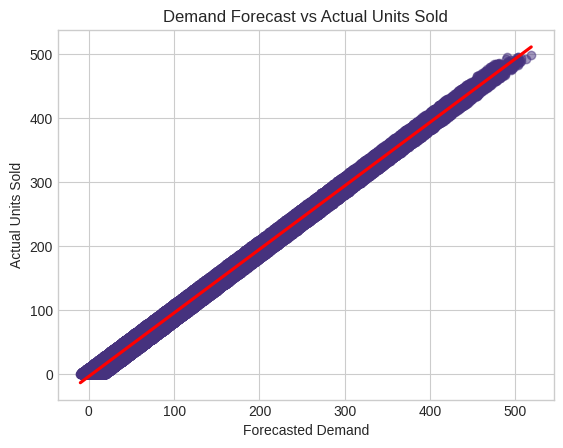

In [ ]:
sns.regplot(x='Demand Forecast', y='Units Sold', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Demand Forecast vs Actual Units Sold')
plt.xlabel('Forecasted Demand')
plt.ylabel('Actual Units Sold')
plt.show()


**Multivariate Analysis**
Goal: Analyze the relationships between multiple variables simultaneously.

In [ ]:
print(df.columns)

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Forecast_Accuracy'],
      dtype='object')


**Pearson Correlation**

Correlation with Demand Forecast:
Demand Forecast       1.000000
Units Sold            0.996853
Inventory Level       0.588561
Forecast_Accuracy     0.505752
Discount              0.002338
Competitor Pricing    0.000844
Price                 0.000675
Units Ordered        -0.001102
Name: Demand Forecast, dtype: float64


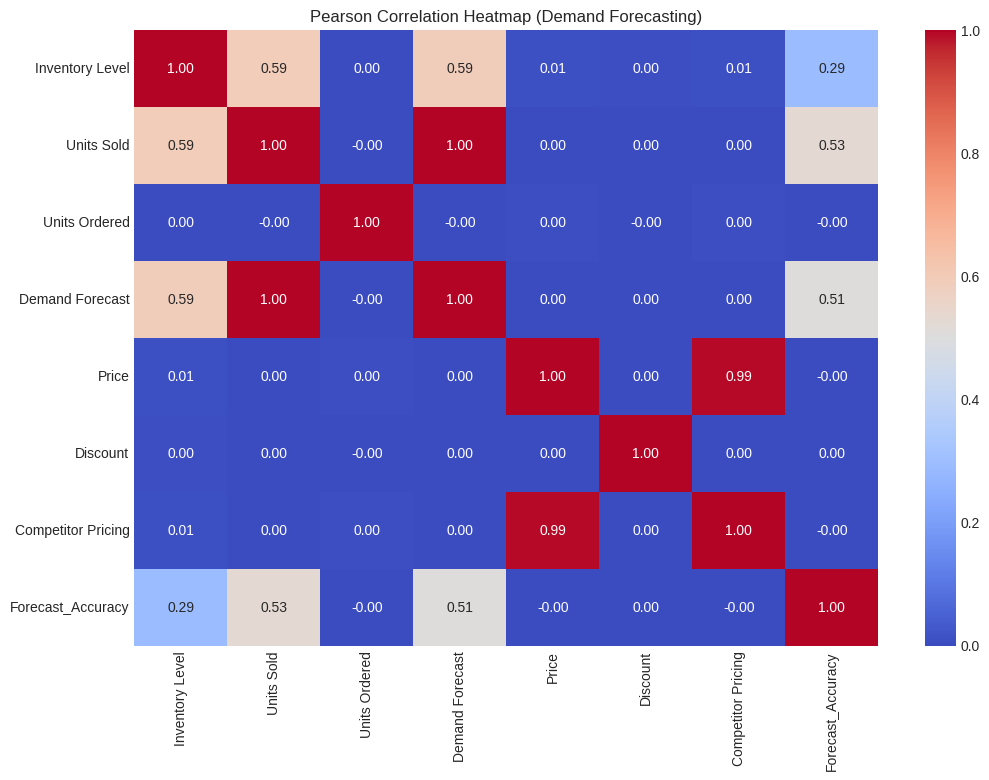

In [ ]:
# Drop nonnumeric columns
non_numeric_cols = ['Date', 'Store ID', 'Product ID', 'Category',
                    'Region', 'Weather Condition', 'Holiday/Promotion', 'Seasonality']
data_numeric = df.drop(columns=non_numeric_cols, errors='ignore')  # drop if exists

# Calculate Pearson correlation matrix
corr = data_numeric.corr(method='pearson')

# Print correlation values with Demand Forecast
if 'Demand Forecast' in corr.columns:
    print("Correlation with Demand Forecast:")
    print(corr['Demand Forecast'].sort_values(ascending=False))
else:
    print("No 'Demand Forecast' column found in numeric data.")

# Visualize correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap (Demand Forecasting)')
plt.show()

**9. Pairplot of Key Variables**
Goal: Visualize the pairwise relationships and distributions of key numerical variables.

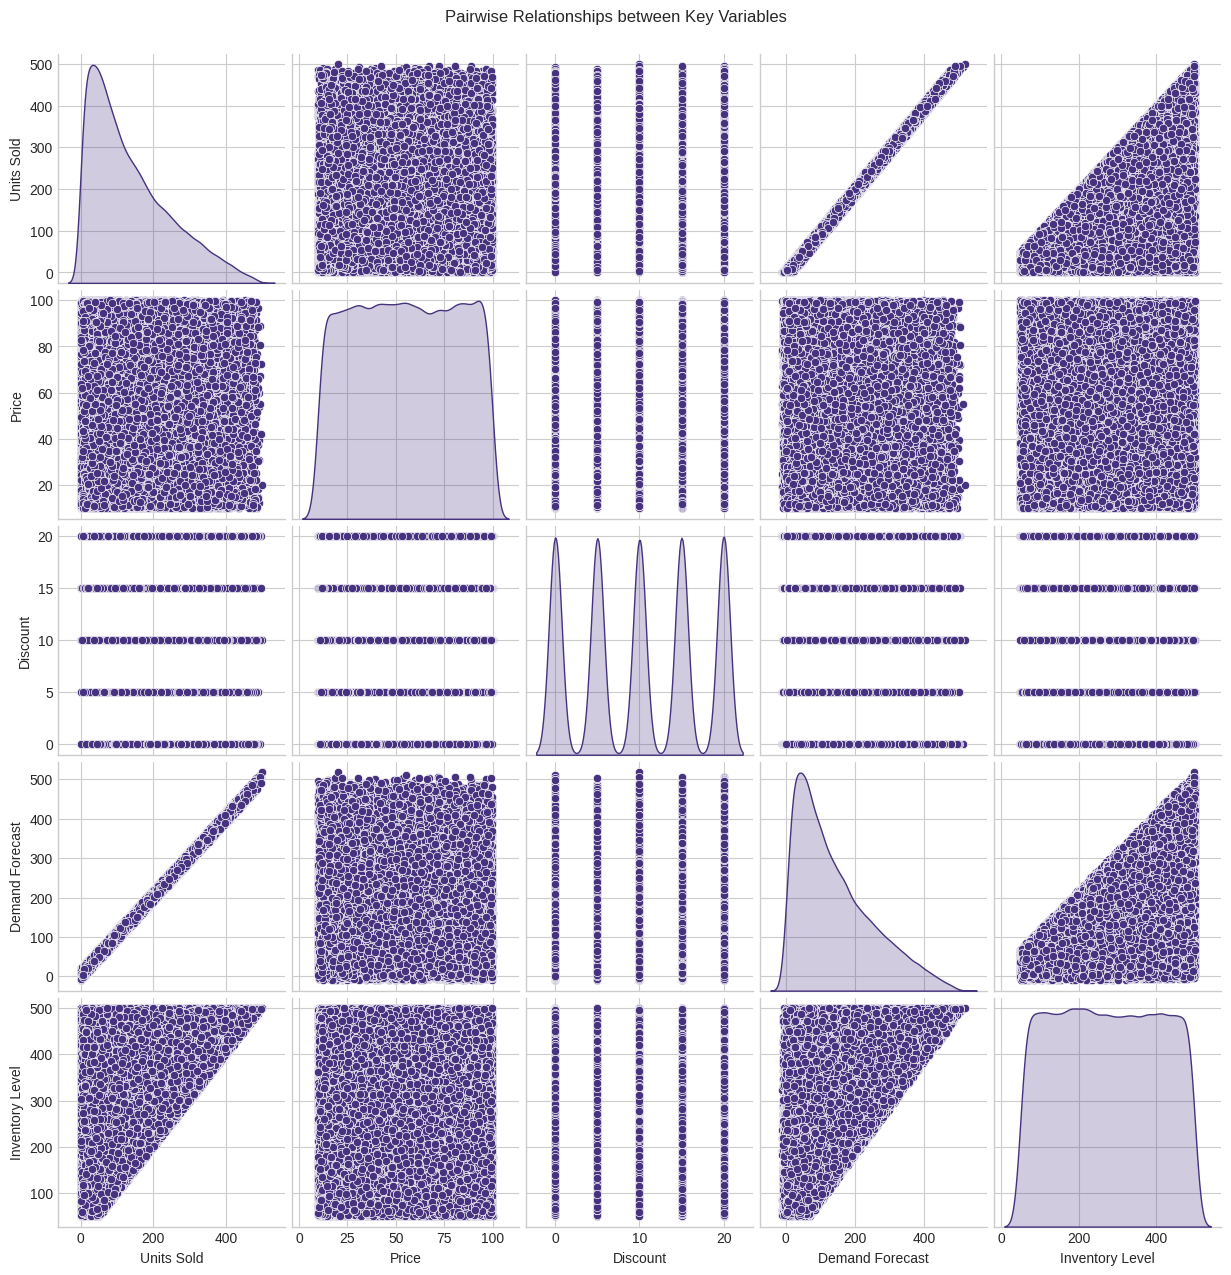

In [ ]:
sns.pairplot(df[['Units Sold','Price','Discount','Demand Forecast','Inventory Level']], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Key Variables', y=1.02)
plt.show()


**forecast Accuracy vs unit sold vs demand forecast **



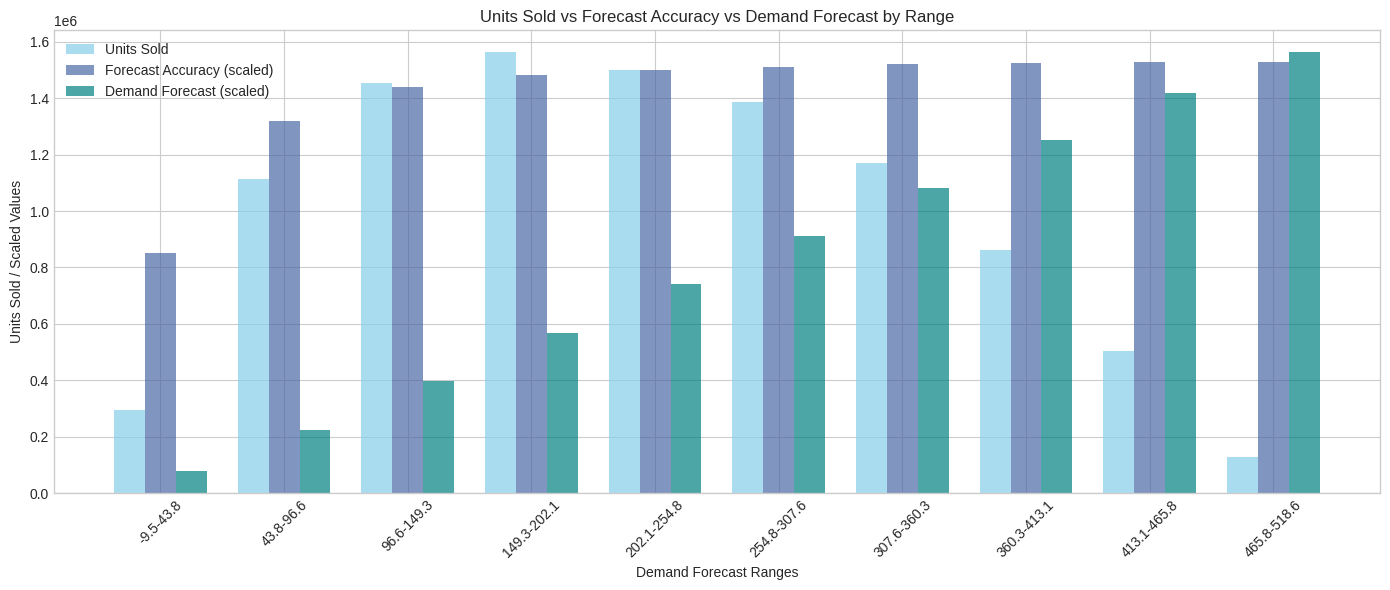

In [ ]:
# Ensure numeric columns
df['Demand Forecast'] = pd.to_numeric(df['Demand Forecast'], errors='coerce')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')

# Remove zero or negative Units Sold
df = df[df['Units Sold'] > 0]

# Calculate Forecast Accuracy if not present
if 'Forecast_Accuracy' not in df.columns:
    df['Forecast_Accuracy'] = 1 - abs(df['Units Sold'] - df['Demand Forecast']) / df['Units Sold']

# Drop invalid values
df = df.replace([np.inf, np.inf], np.nan).dropna(subset=['Units Sold','Demand Forecast','Forecast_Accuracy'])

# Create Demand Forecast ranges (bins)
num_bins = 10
df['Forecast_Range'] = pd.cut(df['Demand Forecast'], bins=num_bins)

# Aggregate by range
agg_data = df.groupby('Forecast_Range').agg({
    'Units Sold':'sum',
    'Forecast_Accuracy':'mean',
    'Demand Forecast':'mean'
}).reset_index()

# Prepare xaxis positions
x = np.arange(len(agg_data))
width = 0.25  # width of each bar

plt.figure(figsize=(14,6))

# Units Sold bar  Sky Blue
plt.bar(x - width, agg_data['Units Sold'], width=width, color='#87CEEB', alpha=0.7, label='Units Sold')

# Forecast Accuracy bar  Blueberry Blue
forecast_scaled = agg_data['Forecast_Accuracy'] * agg_data['Units Sold'].max()
plt.bar(x, forecast_scaled, width=width, color='#4B68A5', alpha=0.7, label='Forecast Accuracy (scaled)')

# Demand Forecast bar  Teal
demand_scaled = agg_data['Demand Forecast'] / agg_data['Demand Forecast'].max() * agg_data['Units Sold'].max()
plt.bar(x + width, demand_scaled, width=width, color='#008080', alpha=0.7, label='Demand Forecast (scaled)')

# Xaxis labels
plt.xticks(x, [f"{round(interval.left,1)}-{round(interval.right,1)}" for interval in agg_data['Forecast_Range']], rotation=45)
plt.xlabel('Demand Forecast Ranges')
plt.ylabel('Units Sold / Scaled Values')
plt.title('Units Sold vs Forecast Accuracy vs Demand Forecast by Range')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Data Processing**
Goal: Prepare the data for machine learning model training.

In [ ]:
print("Missing values:\n", df.isnull().sum())
print("\nShape of dataset:", df.shape)

Missing values:
 Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
Forecast_Accuracy     0
Forecast_Range        0
dtype: int64

Shape of dataset: (72740, 17)


**1. Check Skewness**
Goal: Assess the asymmetry of the distributions of numerical variables.

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].skew()

,0
Inventory Level,0.007289
Units Sold,0.904874
Units Ordered,0.003733
Demand Forecast,0.894398
Price,-0.002682
Discount,-0.001399
Holiday/Promotion,0.009624
Competitor Pricing,-0.002151
Forecast_Accuracy,-2.501462


**6. Split the data into test and train set**
Goal: Divide the dataset into training and testing sets for model development and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Ensure X and y are created from the same 'df' without any prior partial row drops
X = df.drop(columns=["Demand Forecast","Date"])
y = df["Demand Forecast"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (58192, 15)
Testing set size: (14548, 15)


**2. Check for Outliers**
Goal: Identify and visualize potential outliers in the numerical data.

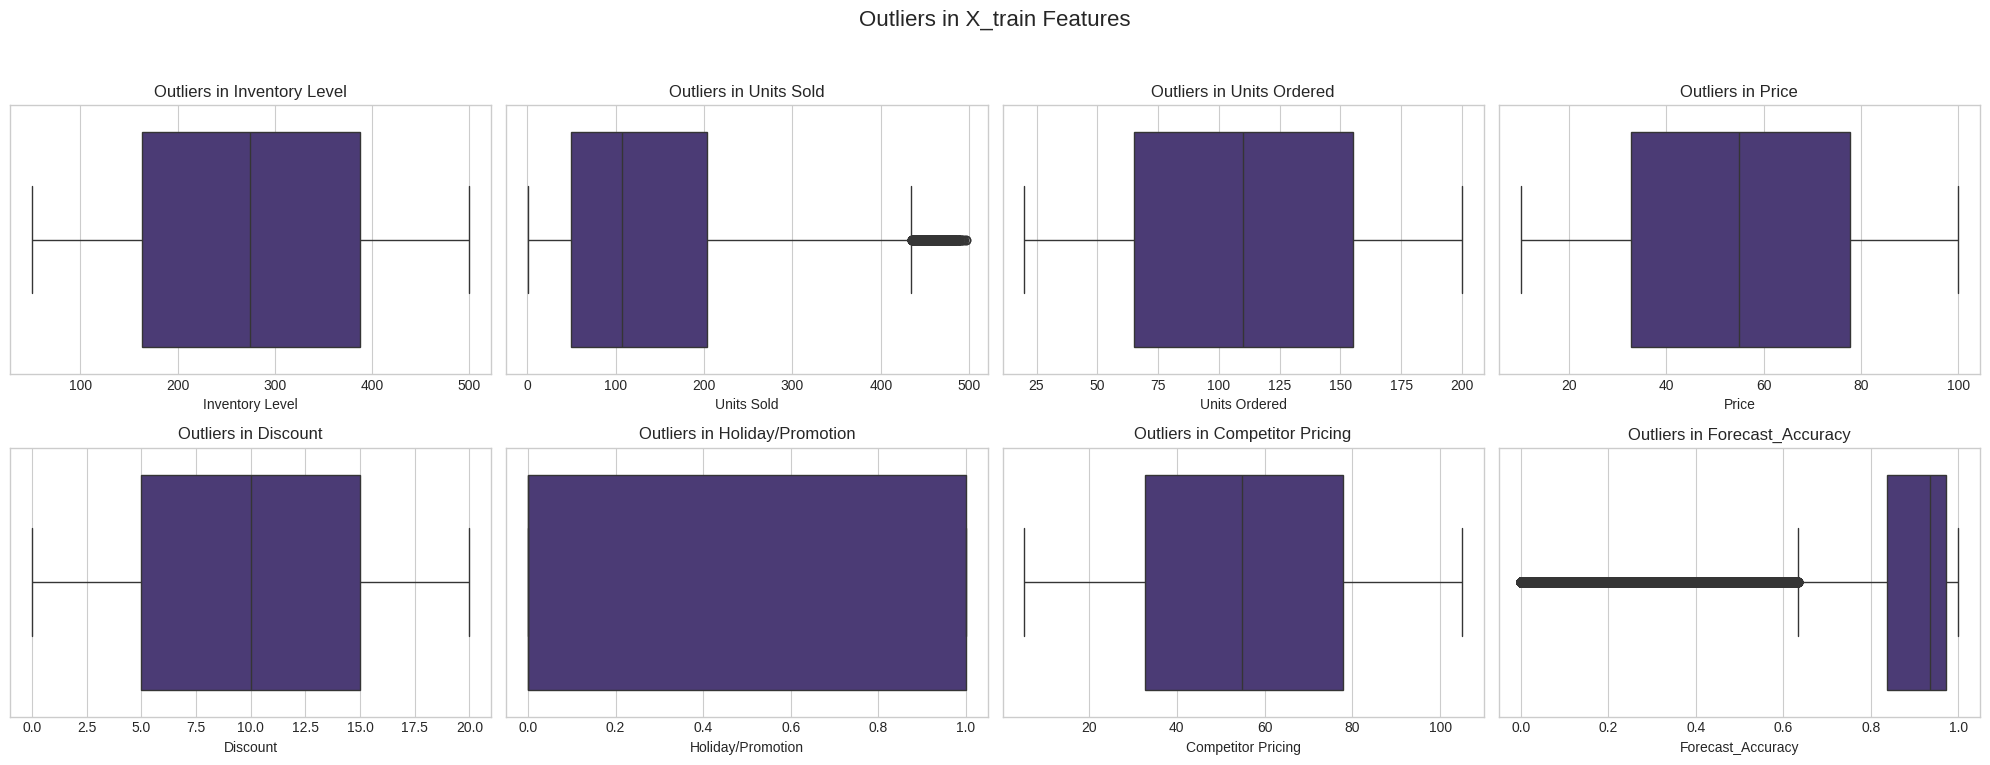

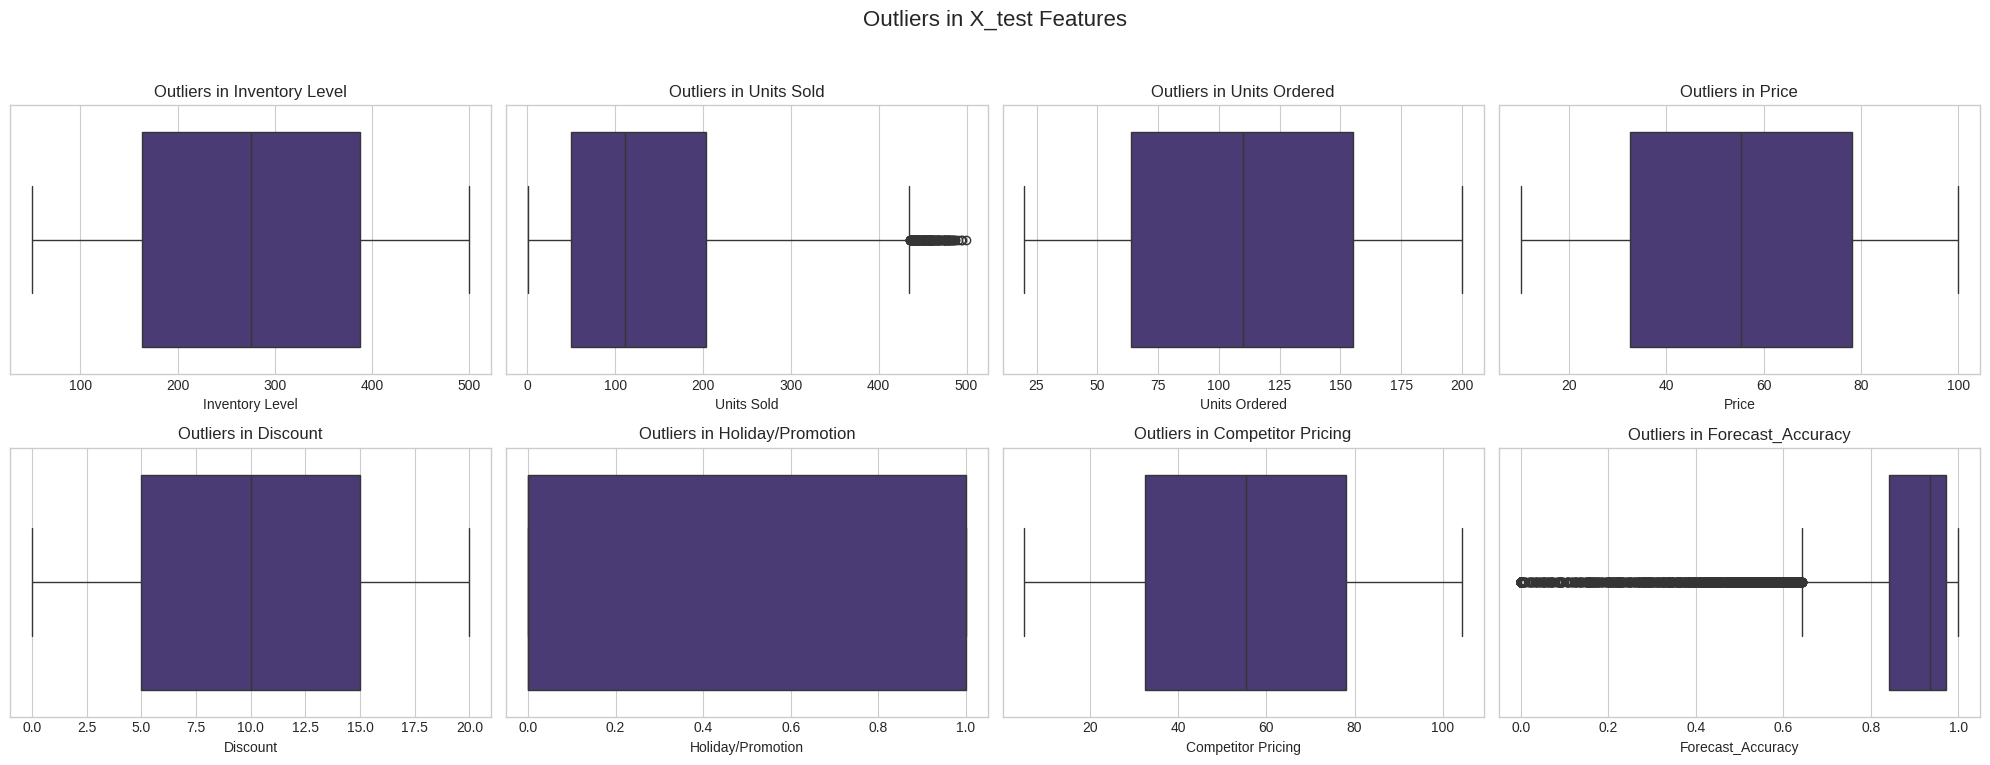

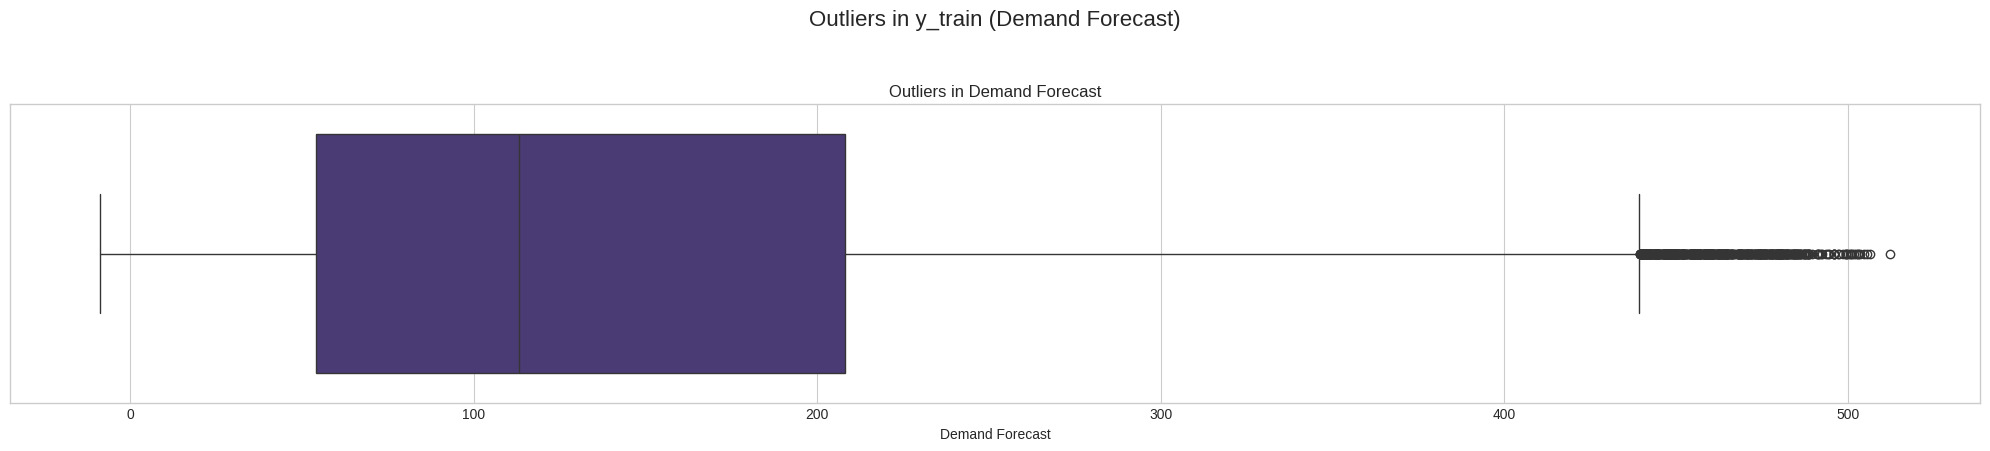

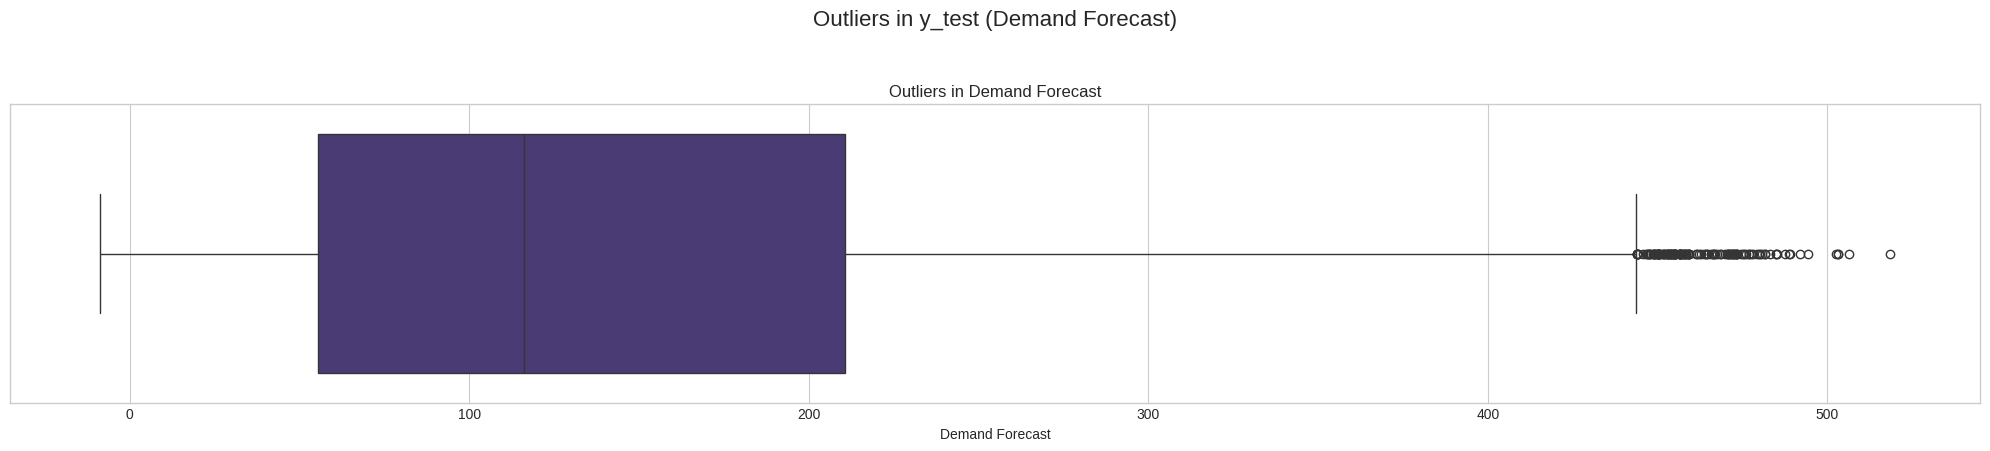

In [ ]:
# Select numeric columns from X_train/X_test (exclude IDs if needed)
numeric_cols_train = [col for col in X_train.select_dtypes(include=['float64', 'int64']).columns if col not in ['Product ID','Store ID']]
numeric_cols_test = [col for col in X_test.select_dtypes(include=['float64', 'int64']).columns if col not in ['Product ID','Store ID']]

# Function to plot boxplots for a DataFrame
def plot_outliers(df, numeric_cols, title):
    plt.figure(figsize=(20, 8))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, (len(numeric_cols)+1)//2, i)
        sns.boxplot(data=df, x=col)
        plt.title(f"Outliers in {col}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

#  Boxplots for features
plot_outliers(X_train, numeric_cols_train, "Outliers in X_train Features")
plot_outliers(X_test, numeric_cols_test, "Outliers in X_test Features")

#  Boxplots for target
# Convert y_train and y_test to DataFrames to use the same function
plot_outliers(y_train.to_frame(), ['Demand Forecast'], "Outliers in y_train (Demand Forecast)")
plot_outliers(y_test.to_frame(), ['Demand Forecast'], "Outliers in y_test (Demand Forecast)")

## Apply Robust Scaling to Numerical Columns



In [ ]:
from sklearn.preprocessing import RobustScaler

# ============================
# PREPROCESSING X (Independent features)
# ============================

# Convert PeriodArray columns to integer type BEFORE onehot encoding or scaling
# This specifically targets the 'Month' column if it's of PeriodDtype
for col in X_train.columns:
    if pd.api.types.is_period_dtype(X_train[col]):
        X_train[col] = X_train[col].astype(int)
for col in X_test.columns:
    if pd.api.types.is_period_dtype(X_test[col]):
        X_test[col] = X_test[col].astype(int)

# Identify categorical columns in X_train
categorical_cols_X = X_train.select_dtypes(include=['object', 'category']).columns

# Apply onehot encoding to categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols_X, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols_X, drop_first=True)

# Ensure columns are aligned. `reindex` is better than manual add/drop for robustness.
# Use X_train_encoded's columns to reindex X_test_encoded, filling missing with 0.
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# IMPORTANT: Ensure X_train_encoded and X_test_encoded rows match their original X_train and X_test indices.
# This explicitly aligns rows based on the original split, guarding against accidental row count changes.
X_train_encoded = X_train_encoded.loc[X_train.index]
X_test_encoded = X_test_encoded.loc[X_test.index]

# Initialize and fit RobustScaler on the encoded X_train
scaler_X = RobustScaler()
scaler_X.fit(X_train_encoded)

# Transform both X_train_encoded and X_test_encoded
X_train_scaled = scaler_X.transform(X_train_encoded)
X_test_scaled = scaler_X.transform(X_test_encoded)

# Convert back to DataFrame for easier inspection (optional, but good for display)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns, index=X_train_encoded.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns, index=X_test_encoded.index)

print("Scaled X_train head:")
display(X_train_scaled_df.head())

# ============================
# SCALE y (Target variable)
# ============================
scaler_y = RobustScaler()

# Reshape y from 1D > 2D for scaling
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Fit only on y_train
scaler_y.fit(y_train_reshaped)

# Transform y_train and y_test
y_train_scaled = scaler_y.transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

# Convert scaled y to DataFrame with aligned index for consistent usage
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=['Demand Forecast'], index=y_train.index)
y_test_scaled_df = pd.DataFrame(y_test_scaled, columns=['Demand Forecast'], index=y_test.index)

print("Scaled y_train head:")
print(y_train_scaled[:5])

Scaled X_train head:


,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Forecast_Accuracy,Store ID_S002,Store ID_S003,...,Seasonality_Winter,"Forecast_Range_(43.818, 96.566]","Forecast_Range_(96.566, 149.314]","Forecast_Range_(149.314, 202.062]","Forecast_Range_(202.062, 254.81]","Forecast_Range_(254.81, 307.558]","Forecast_Range_(307.558, 360.306]","Forecast_Range_(360.306, 413.054]","Forecast_Range_(413.054, 465.802]","Forecast_Range_(465.802, 518.55]"
67535,-0.013393,-0.233766,-0.377778,-0.541868,0.5,0.0,-0.590685,-0.983594,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44981,0.589286,0.733766,-0.300000,0.997617,1.0,0.0,0.937323,0.212082,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
56565,-0.772321,-0.038961,0.233333,0.358991,1.0,0.0,0.452118,-0.848409,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65856,-0.013393,0.837662,0.444444,-0.026046,0.5,1.0,-0.064842,0.273457,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
65741,-0.794643,-0.409091,0.566667,-0.500416,-1.0,1.0,-0.406817,-0.920563,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Scaled y_train head:
[[-0.18186539]
 [ 0.64191601]
 [ 0.03946258]
 [ 0.84065684]
 [-0.50269358]]


### Outliers After Robust Scaling

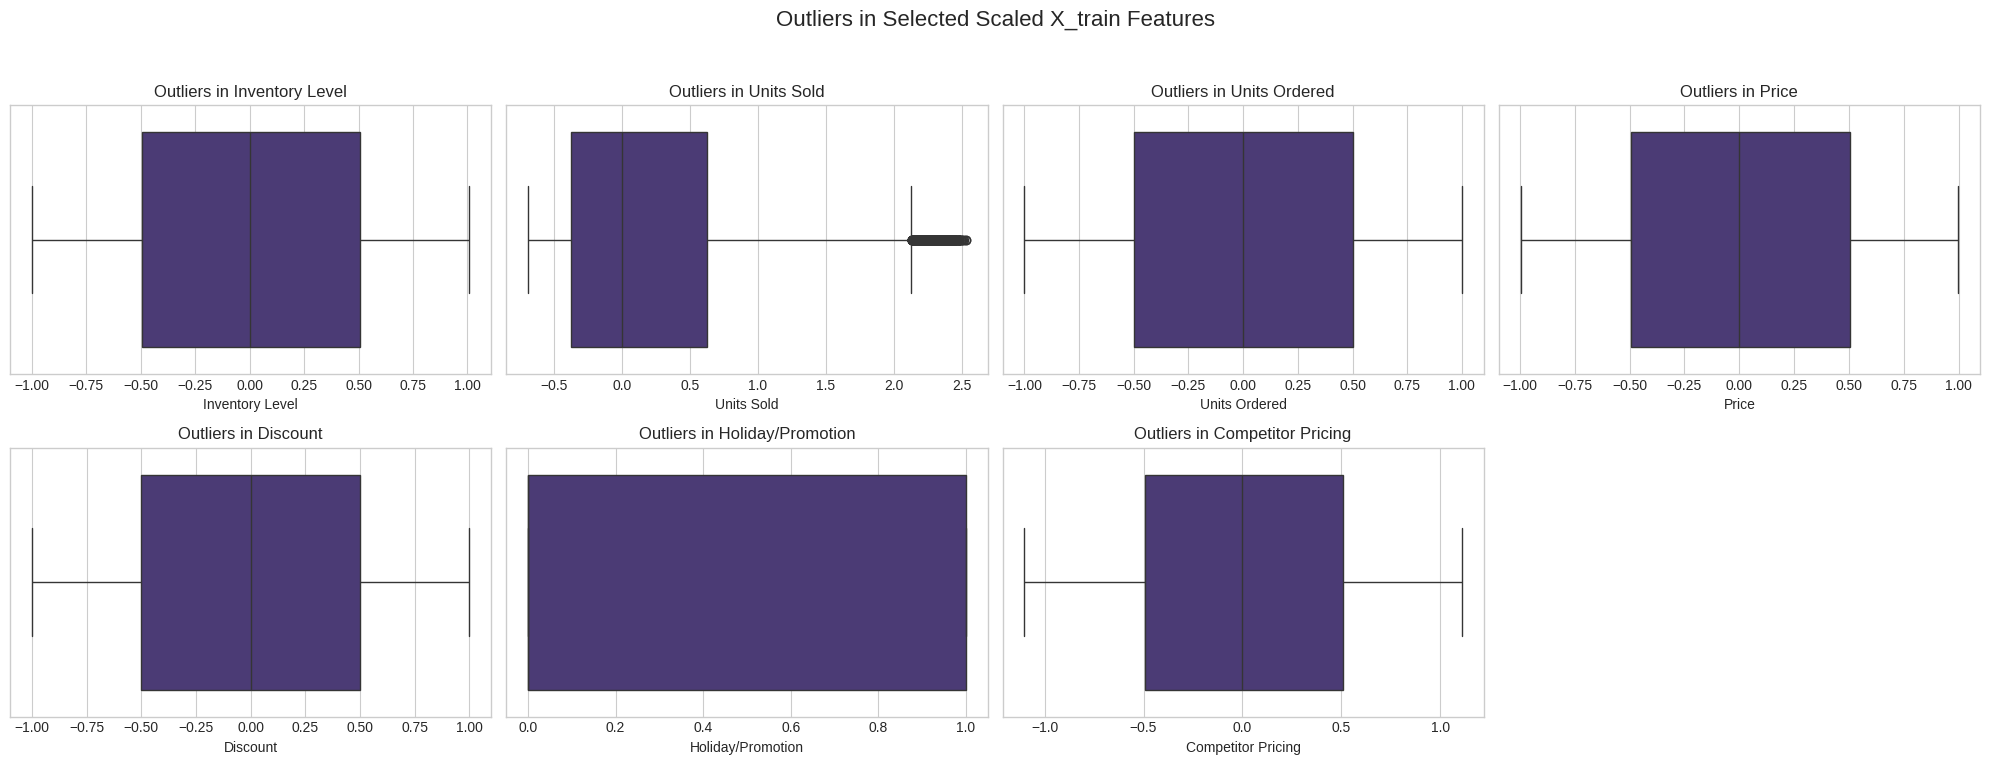

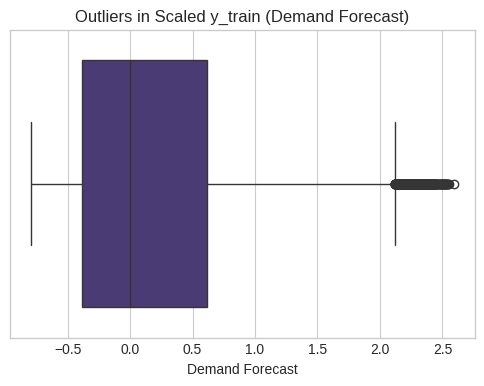

In [ ]:

# Define columns to visualize
desired_numeric_cols = [
    'Inventory Level',
    'Units Sold',
    'Units Ordered',
    'Price',
    'Discount',
    'Holiday/Promotion',
    'Competitor Pricing'
]

# Filter X_train_scaled_df to include only existing columns
columns_to_plot = [col for col in desired_numeric_cols if col in X_train_scaled_df.columns]


# Plot boxplots for selected X_train features

if columns_to_plot:
    plt.figure(figsize=(20, 8))
    for i, col in enumerate(columns_to_plot, 1):
        plt.subplot(2, (len(columns_to_plot)+1)//2, i)
        sns.boxplot(x=X_train_scaled_df[col])
        plt.title(f"Outliers in {col}")
    plt.suptitle("Outliers in Selected Scaled X_train Features", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("None of the specified numeric columns were found in the scaled training data.")


# Optional: Plot outliers for y_train_scaled_df

if 'Demand Forecast' in y_train_scaled_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y_train_scaled_df['Demand Forecast'])
    plt.title("Outliers in Scaled y_train (Demand Forecast)")
    plt.show()


**4. Checking Imbalance**
Goal: Visualize the distribution of categorical variables to identify potential class imbalance.

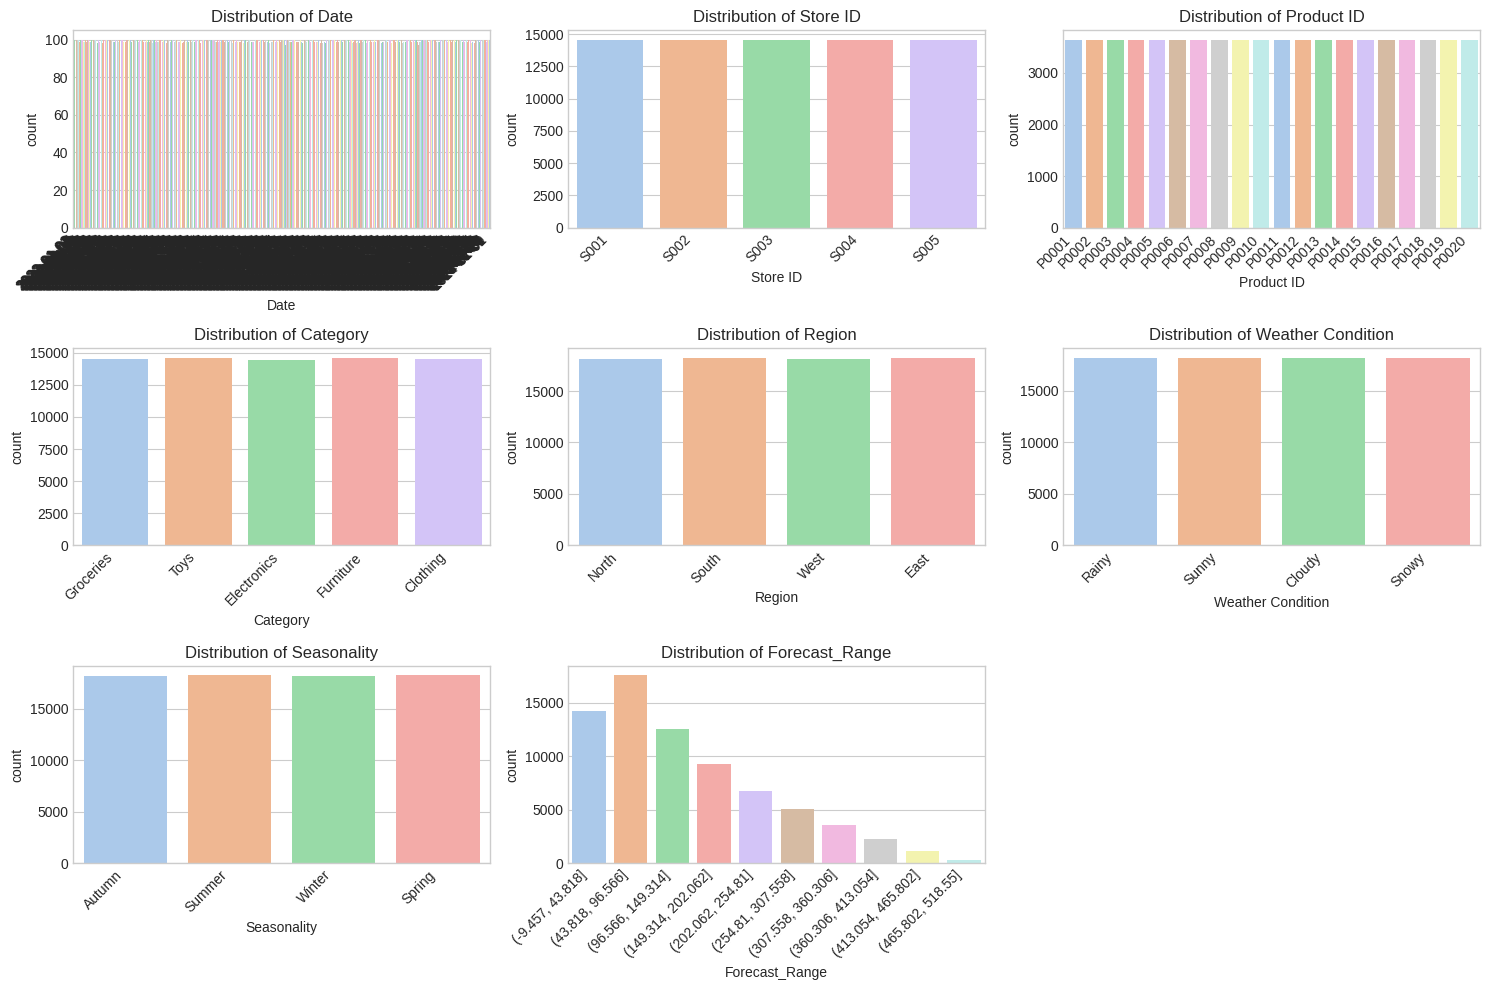

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(15, 10))

# Adjust the number of subplots based on the number of categorical columns
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right') # Rotate xaxis labels for better readability

plt.tight_layout()
plt.show()

### Feature Importance using XGBoost

XGBoost Feature Importances (All Columns):
 Units Sold            0.885603
Forecast_Range        0.109963
Forecast_Accuracy     0.003595
Inventory Level       0.000079
Day                   0.000074
Competitor Pricing    0.000071
Price                 0.000070
Weather Condition     0.000070
Product ID            0.000059
Seasonality           0.000055
Units Ordered         0.000055
Holiday/Promotion     0.000053
Discount              0.000050
Category              0.000046
Region                0.000045
Year                  0.000045
Month                 0.000043
Store ID              0.000023
dtype: float32


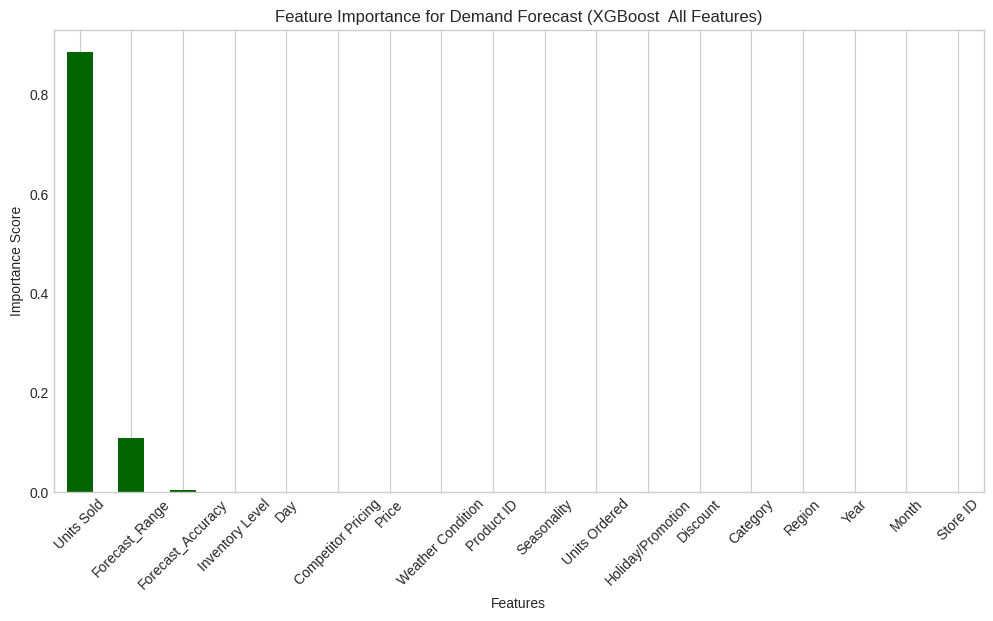

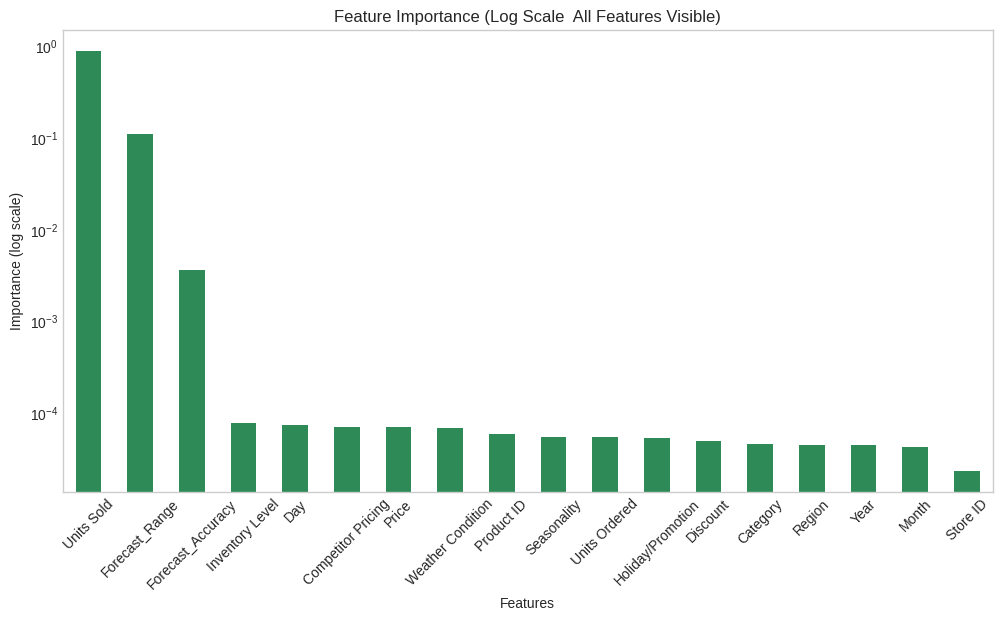

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


df_encoded = df.copy()

# Convert Date into numeric features
if 'Date' in df_encoded.columns:
    df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])
    df_encoded['Year'] = df_encoded['Date'].dt.year
    df_encoded['Month'] = df_encoded['Date'].dt.month
    df_encoded['Day'] = df_encoded['Date'].dt.day
    df_encoded.drop(columns=['Date'], inplace=True)

# Encode categorical/object columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or df_encoded[col].dtype.name == 'category':
        df_encoded[col] = pd.factorize(df_encoded[col])[0]


X = df_encoded.drop(columns=['Demand Forecast'])
y = df_encoded['Demand Forecast']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = XGBRegressor(
    n_estimators=100,
    random_state=42,
    learning_rate=0.1,
    max_depth=5
)
xgb_model.fit(X_train, y_train)



importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print all feature importance values
print("XGBoost Feature Importances (All Columns):\n", importances)

plt.figure(figsize=(12,6))
importances.plot(kind='bar', color='darkgreen')
plt.title("Feature Importance for Demand Forecast (XGBoost  All Features)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='', linewidth=0.5)
plt.show()


plt.figure(figsize=(12,6))
importances.plot(kind='bar', color='seagreen')
plt.title("Feature Importance (Log Scale  All Features Visible)")
plt.ylabel("Importance (log scale)")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.yscale('log')
plt.grid(True, which="both", linestyle='', linewidth=0.5)
plt.show()


**Task 3. Fit to ML model**
Goal: Train different machine learning models to predict demand forecast.

In [ ]:
# models for regression (Linear Regression,Random Forest,Gradient Boosting)

#Linear Regression

Linear Regression  Mean Squared Error (MSE): 52.98
Linear Regression  Root Mean Squared Error (RMSE): 7.28
Linear Regression  Rsquared (R2): 1.00


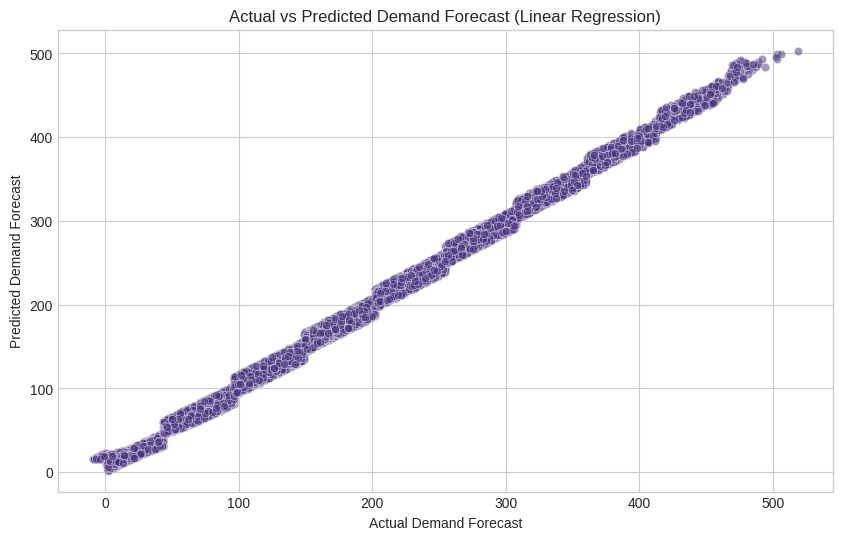

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define and fit the model

linear_reg_model = LinearRegression()
# Use scaled DataFrames, ensuring their indices are aligned from the previous step
linear_reg_model.fit(X_train_scaled_df, y_train_scaled_df)


# Make predictions on the test set

y_pred_lr_scaled = linear_reg_model.predict(X_test_scaled_df)


# Inverse transform predictions to original scale

y_pred_lr = scaler_y.inverse_transform(y_pred_lr_scaled) # No need to reshape here if y_pred_lr_scaled is already 2D


# Evaluate the model

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression  Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Linear Regression  Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"Linear Regression  Rsquared (R2): {r2_lr:.2f}")


# Plot Actual vs Predicted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr.flatten(), alpha=0.5)  # Flatten y_pred_lr for plotting
plt.xlabel("Actual Demand Forecast")
plt.ylabel("Predicted Demand Forecast")
plt.title("Actual vs Predicted Demand Forecast (Linear Regression)")
plt.grid(True)
plt.show()

#Rendom Forest Regressor

**3. Random Forest Regressor**
Goal: Train and evaluate a Random Forest Regressor model for demand forecasting.

Random Forest model trained successfully.
Random Forest  Mean Squared Error (MSE): 20.53
Random Forest  Root Mean Squared Error (RMSE): 4.53
Random Forest  Rsquared (R2): 1.00


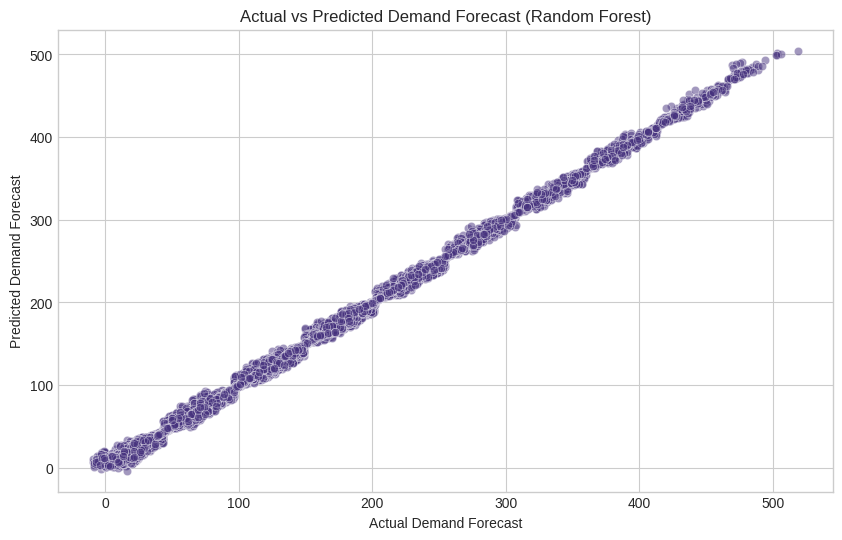

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define and fit the model

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled_df, y_train_scaled_df.values.ravel())  # Flatten y for training

print("Random Forest model trained successfully.")


# Make predictions on the test set

y_pred_scaled_rf = random_forest_model.predict(X_test_scaled_df)


# Inverse transform predictions to original scale

y_pred_rf = scaler_y.inverse_transform(y_pred_scaled_rf.reshape(-1, 1))


# Evaluate the model

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest  Rsquared (R2): {r2_rf:.2f}")


# Plot Actual vs Predicted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf.flatten(), alpha=0.5)
plt.xlabel("Actual Demand Forecast")
plt.ylabel("Predicted Demand Forecast")
plt.title("Actual vs Predicted Demand Forecast (Random Forest)")
plt.grid(True)
plt.show()

**5. Gradient Boosting Regressor**
Goal: Train and evaluate a Gradient Boosting Regressor model for demand forecasting.

Gradient Boosting model trained successfully.
Gradient Boosting  Mean Squared Error (MSE): 26.25
Gradient Boosting  Root Mean Squared Error (RMSE): 5.12
Gradient Boosting  Rsquared (R2): 1.00


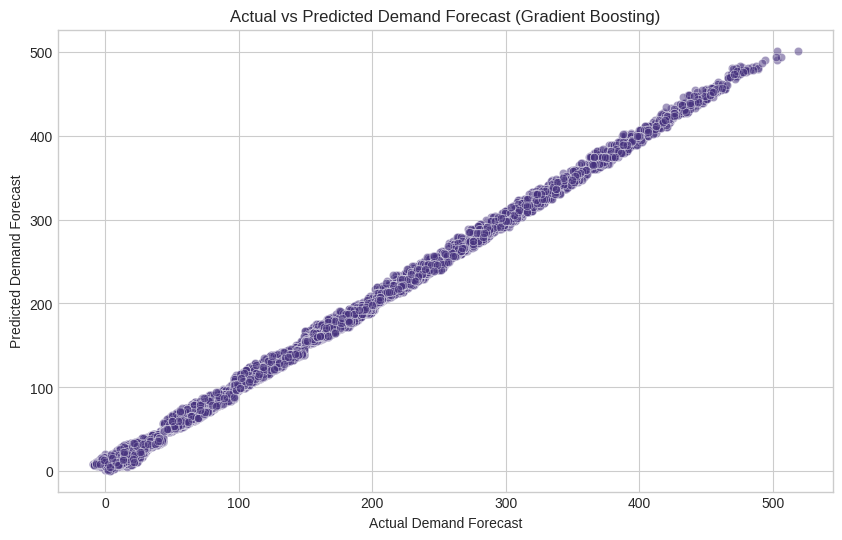

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define and fit the model

gradient_boosting_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit on scaled features and flattened scaled target
gradient_boosting_model.fit(X_train_scaled_df, y_train_scaled_df.values.ravel())
print("Gradient Boosting model trained successfully.")


# Make predictions on the test set

y_pred_scaled_gb = gradient_boosting_model.predict(X_test_scaled_df)


# Inverse transform predictions to original scale

y_pred_gb = scaler_y.inverse_transform(y_pred_scaled_gb.reshape(-1, 1))


# Evaluate the model

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting  Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Gradient Boosting  Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"Gradient Boosting  Rsquared (R2): {r2_gb:.2f}")


# Plot Actual vs Predicted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb.flatten(), alpha=0.5)
plt.xlabel("Actual Demand Forecast")
plt.ylabel("Predicted Demand Forecast")
plt.title("Actual vs Predicted Demand Forecast (Gradient Boosting)")
plt.grid(True)
plt.show()

**xgboost**

XGBoost Regressor model trained successfully.
XGBoost Regressor  Mean Squared Error (MSE): 22.31
XGBoost Regressor  Root Mean Squared Error (RMSE): 4.72
XGBoost Regressor  Rsquared (R2): 1.00


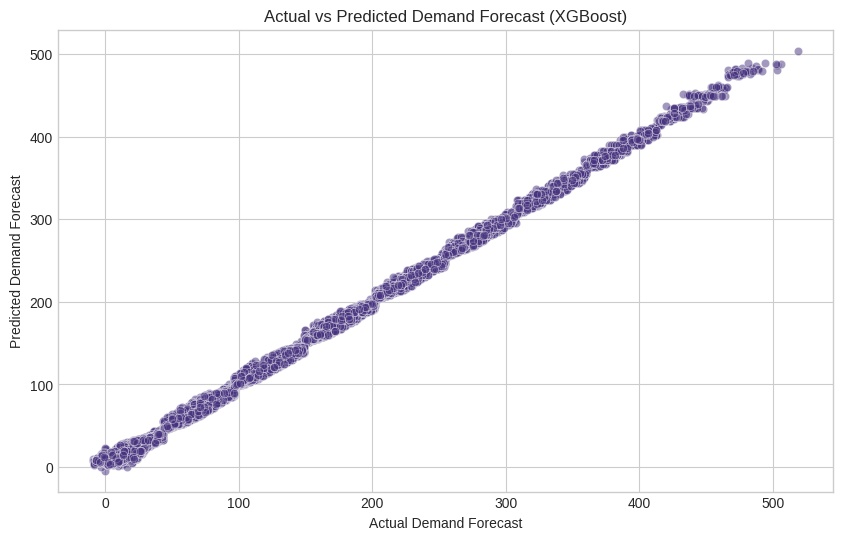

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Instantiate and train XGBoost Regressor

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror',
    eval_metric='rmse'
)

# Fit using NumPy arrays to avoid column name issues
xgb_model.fit(X_train_scaled_df.values, y_train_scaled_df.values.ravel())
print("XGBoost Regressor model trained successfully.")


# Make predictions on the test set

y_pred_scaled_xgb = xgb_model.predict(X_test_scaled_df.values)


# Inverse transform predictions to original scale

y_pred_xgb = scaler_y.inverse_transform(y_pred_scaled_xgb.reshape(-1, 1))


# Evaluate the model

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor  Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"XGBoost Regressor  Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"XGBoost Regressor  Rsquared (R2): {r2_xgb:.2f}")


# Plot Actual vs Predicted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb.flatten(), alpha=0.5)
plt.xlabel("Actual Demand Forecast")
plt.ylabel("Predicted Demand Forecast")
plt.title("Actual vs Predicted Demand Forecast (XGBoost)")
plt.grid(True)
plt.show()

**ANN**

ANN model trained successfully.
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
ANN  Mean Squared Error (MSE): 26.79
ANN  Root Mean Squared Error (RMSE): 5.18
ANN  Rsquared (R2): 1.00


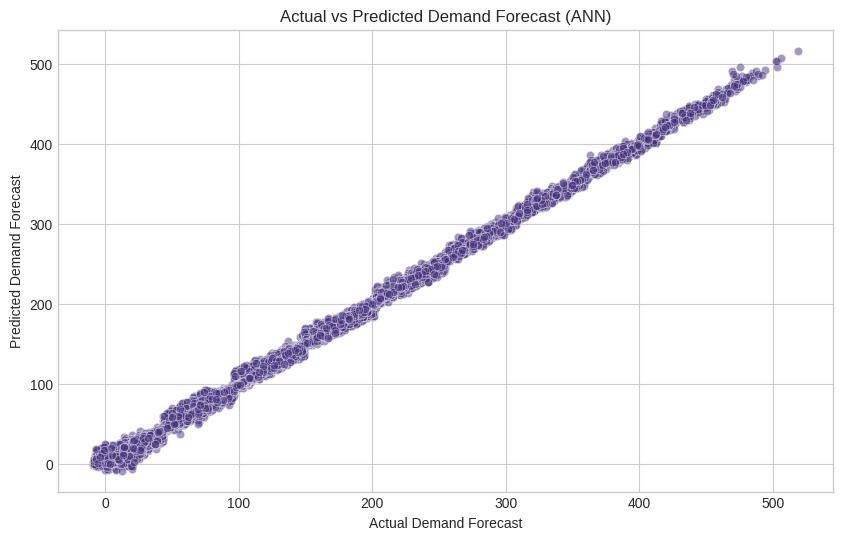

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Build the ANN model

ann_model = Sequential([
    Dense(64, input_dim=X_train_scaled_df.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),                                         # Second hidden layer
    Dense(1, activation='linear')                                         # Output layer for regression
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse')


# Train the model

ann_model.fit(
    X_train_scaled_df,
    y_train_scaled_df.values,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0  # Silent training
)

print("ANN model trained successfully.")


# Make predictions on test set

y_pred_scaled_ann = ann_model.predict(X_test_scaled_df)


# Inverse transform predictions to original scale

y_pred_ann = scaler_y.inverse_transform(y_pred_scaled_ann)


# Evaluate the model

mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"ANN  Mean Squared Error (MSE): {mse_ann:.2f}")
print(f"ANN  Root Mean Squared Error (RMSE): {rmse_ann:.2f}")
print(f"ANN  Rsquared (R2): {r2_ann:.2f}")


# Plot Actual vs Predicted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ann.flatten(), alpha=0.5)
plt.xlabel("Actual Demand Forecast")
plt.ylabel("Predicted Demand Forecast")
plt.title("Actual vs Predicted Demand Forecast (ANN)")
plt.grid(True)
plt.show()

**Task 4: Model Evaluation**


**1. Evaluate Models**



**2. Model Results**



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate any regression model

def evaluate_model(y_true, y_pred, model_name):
    # Ensure y_pred is flattened if it's 2D (like from inverse_transform)
    if y_pred.ndim == 2 and y_pred.shape[1] == 1:
        y_pred = y_pred.flatten()

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    }


# Collect all model results

model_results = []

# Add all models
model_results.append(evaluate_model(y_test, y_pred_lr, "Linear Regression"))
model_results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
model_results.append(evaluate_model(y_test, y_pred_gb, "Gradient Boosting"))
model_results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))
model_results.append(evaluate_model(y_test, y_pred_ann, "ANN"))  # ANN predictions


# Convert to DataFrame for comparison

model_results_df = pd.DataFrame(model_results)

# Sort by R² Score (best performing first)
model_results_df = model_results_df.sort_values(by="R² Score", ascending=False).reset_index(drop=True)

# Display results
display(model_results_df)

,Model,MAE,MSE,RMSE,R² Score
0,Random Forest,2.922446,20.534367,4.531486,0.998258
1,XGBoost,3.545420,22.311232,4.723477,0.998108
2,Gradient Boosting,4.005438,26.247550,5.123236,0.997774
3,ANN,3.728755,26.790305,5.175935,0.997728
4,Linear Regression,5.982865,52.982709,7.278922,0.995506


**3. Display Model Results**



**4. Visualize Model Comparison**



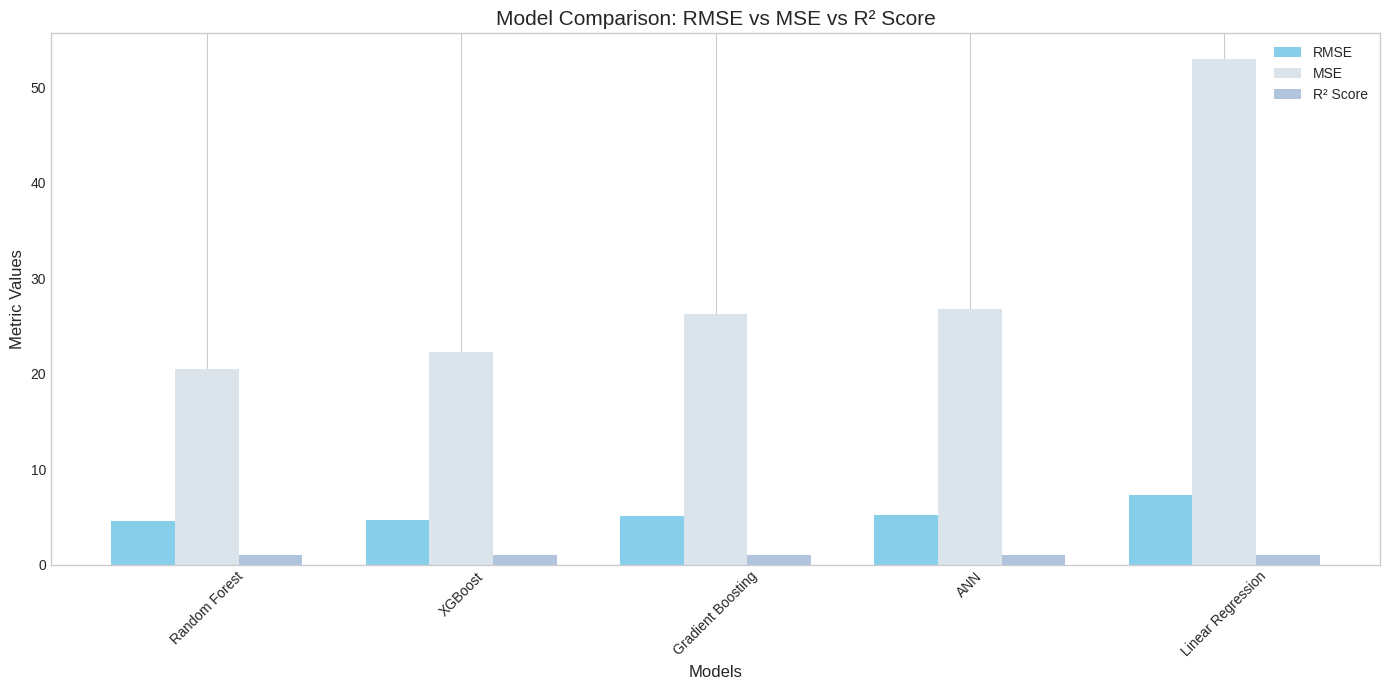

In [ ]:


# Convert results to DataFrame and sort by RMSE

results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

# Extract values
models = results_df['Model']
rmse = results_df['RMSE']
mse = results_df['MSE']
r2 = results_df['R² Score']  # Make sure column name matches your DF


# Create grouped bar chart

plt.figure(figsize=(14, 7))

bar_width = 0.25
positions = np.arange(len(models))

plt.bar(positions - bar_width, rmse, width=bar_width, label='RMSE', color='skyblue')
plt.bar(positions, mse, width=bar_width, label='MSE', color='#DCE4EB')
plt.bar(positions + bar_width, r2, width=bar_width, label='R² Score', color='#B0C4DE')

plt.xticks(positions, models, rotation=45)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Metric Values', fontsize=12)
plt.title('Model Comparison: RMSE vs MSE vs R² Score', fontsize=15)
plt.grid(axis='y', linestyle='', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()